In [1]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandasql as psql

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Step -2
#Load the data
StrokeData=pd.read_csv(r"D:\navvspace\Danger\Brain Stroke\full_data.csv",header=0)



In [3]:
#Step -3
#Copy to back_up file
StrokeData_bk=StrokeData.copy()
#Display first 5 records
StrokeData.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
#Step -4
#Display the data set information
StrokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
StrokeData.stroke.value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [6]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

stroke_count = StrokeData.stroke.value_counts()
print("Class 0 : ",stroke_count[0])
print("Class 1 : ",stroke_count[1])
print("proportion: ",stroke_count[0]/stroke_count[1],":1")

Class 0 :  4733
Class 1 :  248
proportion:  19.08467741935484 :1


In [7]:
#Step -5
#Display the unique values of the data set
StrokeData.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [8]:
# Count the missig values by each variable, if available
StrokeData.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#Step -6
#Check the duplicate  values with in  dataset if available
StrokeData_dup=StrokeData[StrokeData.duplicated(keep='last')]
StrokeData_dup

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [10]:
#Step 7
# plotting histogram for the target variable.

#sns.histplot(StrokeData['stroke'],kde=True)

In [11]:
#Step -8,9
#use LabelEncoder for target variable
object_col = ["gender", "ever_married", "Residence_type","smoking_status","work_type"]
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in object_col:
    StrokeData[col] = LE.fit_transform(StrokeData[col])

In [12]:
#Display the data set information
StrokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [13]:
#Display the dataset
StrokeData.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [14]:
# Display descriptive statistics
StrokeData.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [15]:
# Finding Correlation Between Target and Remaining Variables
StrokeData.corrwith(StrokeData['stroke'])

gender               0.008870
age                  0.246478
hypertension         0.131965
heart_disease        0.134610
ever_married         0.108398
work_type           -0.041835
Residence_type       0.016494
avg_glucose_level    0.133227
bmi                  0.056926
smoking_status       0.027463
stroke               1.000000
dtype: float64

In [16]:
cols = ['age','work_type','avg_glucose_level','bmi','smoking_status','stroke']
SD = StrokeData[cols]
SD.corr()

,age,work_type,avg_glucose_level,bmi,smoking_status,stroke
age,1.000000,-0.415935,0.236763,0.373703,0.265623,0.246478
work_type,-0.415935,1.000000,-0.059658,-0.382418,-0.356738,-0.041835
avg_glucose_level,0.236763,-0.059658,1.000000,0.186348,0.064089,0.133227
bmi,0.373703,-0.382418,0.186348,1.000000,0.243111,0.056926
smoking_status,0.265623,-0.356738,0.064089,0.243111,1.000000,0.027463
stroke,0.246478,-0.041835,0.133227,0.056926,0.027463,1.000000


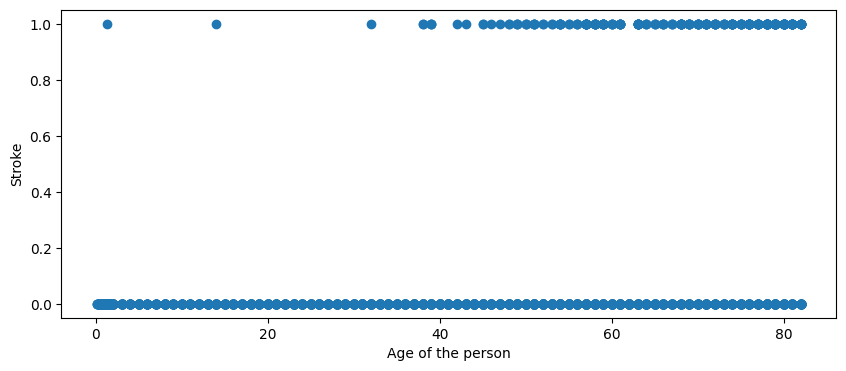

In [17]:
fig,ax = plt.subplots(figsize = (10,4))
ax.scatter(x = StrokeData['age'],y = StrokeData['stroke'])
plt.xlabel("Age of the person")
plt.ylabel("Stroke")
plt.show()

In [18]:
#Identify the variables to normalize with minmaxscalar
cols=['age','gender','hypertension','ever_married','heart_disease','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

In [19]:
#Step -10
# identify the Independent and Target (dependent variables)
IndepVar = []
for col in StrokeData.columns:
    if col != 'stroke':
        IndepVar.append(col)
TargetVar = 'stroke'
x = StrokeData[IndepVar]
y = StrokeData[TargetVar]

In [20]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)

print(y_over.shape)

(5324, 10)
(5324,)


In [21]:
#Step -11
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3726, 10), (1598, 10), (3726,), (1598,))

In [22]:
#Step -12
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)


In [23]:
stroke_count = y_train.value_counts()
print("Class 0 : ",stroke_count[0])
print("Class 1 : ",stroke_count[1])
print("proportion: ",stroke_count[0]/stroke_count[1],":1")

Class 0 :  3326
Class 1 :  400
proportion:  8.315 :1


In [24]:
#Load the result file for SVM
SVMResults=pd.read_csv(r"D:\navvspace\Danger\Brain Stroke\SVMResults.csv",header=0)
#Display the  first five records
SVMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM- Linear Kernel

Model Name:  SVM - Linear
Confusion matrix : 
 [[   0  191]
 [   0 1407]]
Outcome values : 
 0 191 0 1407
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       191
           0       0.88      1.00      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.44      0.50      0.47      1598
weighted avg       0.78      0.88      0.82      1598

Accuracy : 88.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


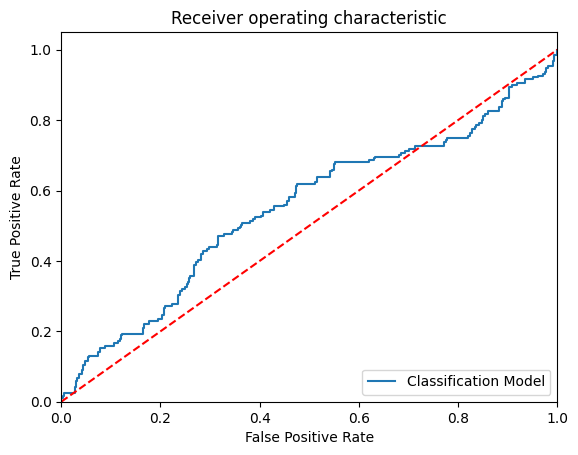

In [25]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = pd.concat([SVMResults, pd.DataFrame([new_row])], ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# Polynomial Kernel

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[   6  185]
 [  10 1397]]
Outcome values : 
 6 185 10 1397
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.03      0.06       191
           0       0.88      0.99      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.63      0.51      0.50      1598
weighted avg       0.82      0.88      0.83      1598

Accuracy : 87.8 %
Precision : 37.5 %
Recall : 3.1 %
F1 Score : 0.058
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 51.2 %
MCC : 0.079
roc_auc_score: 0.512


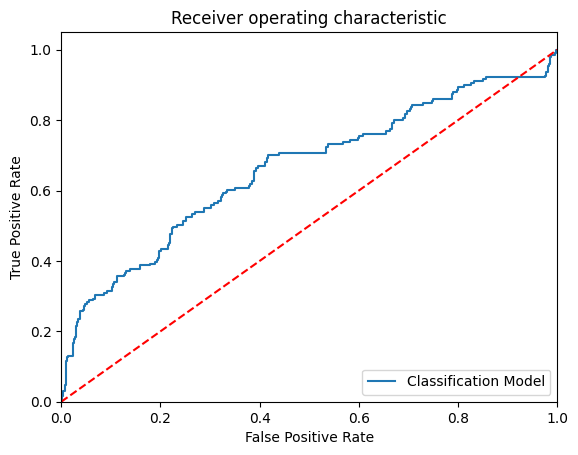

In [26]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
new_row = {'Model Name' : "SVM - Polynomial",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = pd.concat([SVMResults, pd.DataFrame([new_row])], ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# Gaussian Kernel

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 163   28]
 [ 377 1030]]
Outcome values : 
 163 28 377 1030
Classification report : 
               precision    recall  f1-score   support

           1       0.30      0.85      0.45       191
           0       0.97      0.73      0.84      1407

    accuracy                           0.75      1598
   macro avg       0.64      0.79      0.64      1598
weighted avg       0.89      0.75      0.79      1598

Accuracy : 74.7 %
Precision : 30.2 %
Recall : 85.3 %
F1 Score : 0.446
Specificity or True Negative Rate : 73.2 %
Balanced Accuracy : 79.2 %
MCC : 0.402
roc_auc_score: 0.793


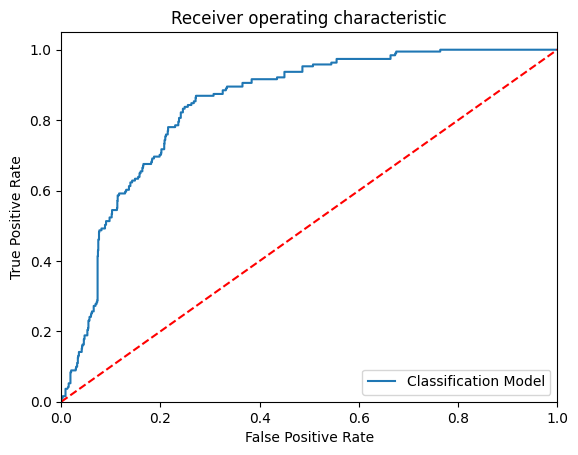

In [27]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = pd.concat([SVMResults, pd.DataFrame([new_row])], ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# Sigmoid Kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 80 111]
 [775 632]]
Outcome values : 
 80 111 775 632
Classification report : 
               precision    recall  f1-score   support

           1       0.09      0.42      0.15       191
           0       0.85      0.45      0.59      1407

    accuracy                           0.45      1598
   macro avg       0.47      0.43      0.37      1598
weighted avg       0.76      0.45      0.54      1598

Accuracy : 44.6 %
Precision : 9.4 %
Recall : 41.9 %
F1 Score : 0.153
Specificity or True Negative Rate : 44.9 %
Balanced Accuracy : 43.4 %
MCC : -0.086
roc_auc_score: 0.434


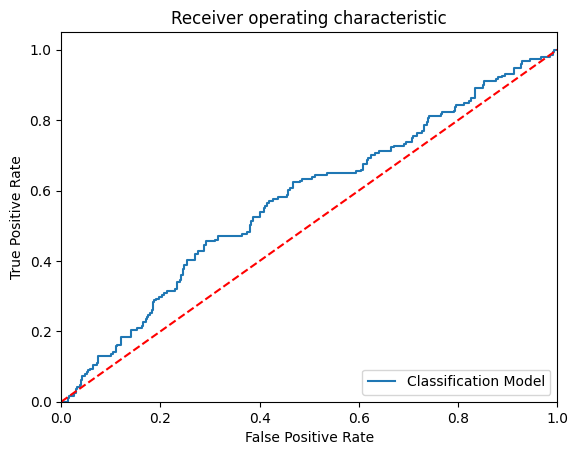

In [28]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = pd.concat([SVMResults, pd.DataFrame([new_row])], ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [29]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,191,0,1407,0.880,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynomial,6,185,10,1397,0.878,0.375,0.031,0.058,0.993,0.079,0.512153,0.512
2,SVM - Gaussian,163,28,377,1030,0.747,0.302,0.853,0.446,0.732,0.402,0.792729,0.792
3,SVM - Sigmoid,80,111,775,632,0.446,0.094,0.419,0.153,0.449,-0.086,0.434015,0.434


In [30]:
#Load the result file for KNN
KNNResults=pd.read_csv(r"D:\navvspace\Danger\Brain Stroke\KNN_Results.csv",header=0)
#Display the  first five records
KNNResults.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 142   49]
 [  77 1330]]
Outcome values : 
 142 49 77 1330
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.74      0.69       191
           0       0.96      0.95      0.95      1407

    accuracy                           0.92      1598
   macro avg       0.81      0.84      0.82      1598
weighted avg       0.93      0.92      0.92      1598

Accuracy : 92.1 %
Precision : 64.8 %
Recall : 74.3 %
F1 Score : 0.693
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 84.4 %
MCC : 0.65
roc_auc_score: 0.844


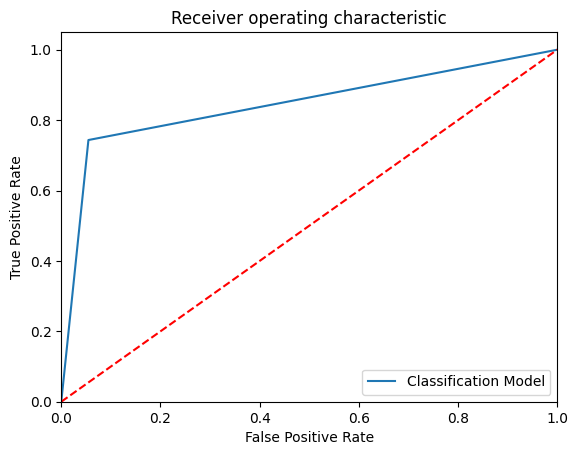

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  87  104]
 [  57 1350]]
Outcome values : 
 87 104 57 1350
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.46      0.52       191
           0       0.93      0.96      0.94      1407

    accuracy                           0.90      1598
   macro avg       0.77      0.71      0.73      1598
weighted avg       0.89      0.90      0.89      1598

Accuracy : 89.9 %
Precision : 60.4 %
Recall : 45.5 %
F1 Score : 0.519
Specificity or True Negative Rate : 95.9 %
Balanced Accuracy : 70.7 %
MCC : 0.47
roc_auc_score: 0.707


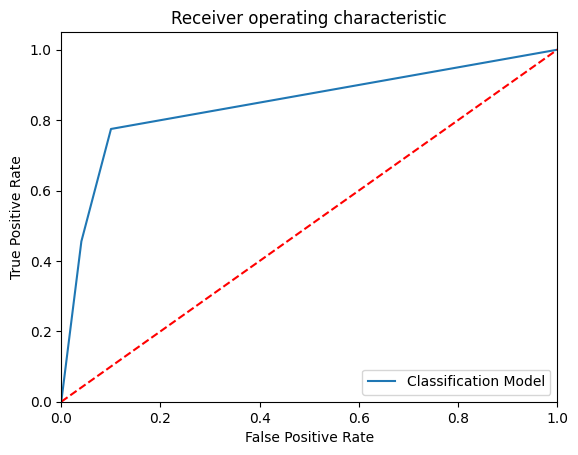

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 102   89]
 [ 105 1302]]
Outcome values : 
 102 89 105 1302
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.53      0.51       191
           0       0.94      0.93      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.71      0.73      0.72      1598
weighted avg       0.88      0.88      0.88      1598

Accuracy : 87.9 %
Precision : 49.3 %
Recall : 53.4 %
F1 Score : 0.513
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 73.0 %
MCC : 0.444
roc_auc_score: 0.73


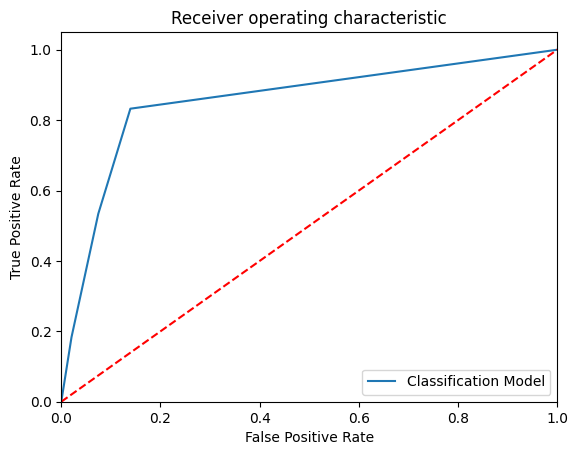

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  43  148]
 [  58 1349]]
Outcome values : 
 43 148 58 1349
Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.23      0.29       191
           0       0.90      0.96      0.93      1407

    accuracy                           0.87      1598
   macro avg       0.66      0.59      0.61      1598
weighted avg       0.84      0.87      0.85      1598

Accuracy : 87.1 %
Precision : 42.6 %
Recall : 22.5 %
F1 Score : 0.295
Specificity or True Negative Rate : 95.9 %
Balanced Accuracy : 59.2 %
MCC : 0.245
roc_auc_score: 0.592


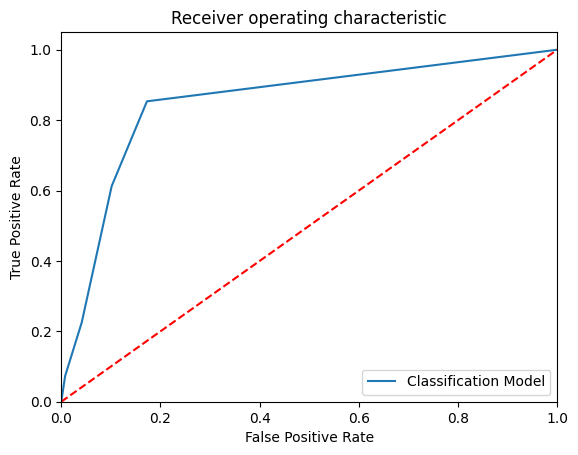

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  55  136]
 [  83 1324]]
Outcome values : 
 55 136 83 1324
Classification report : 
               precision    recall  f1-score   support

           1       0.40      0.29      0.33       191
           0       0.91      0.94      0.92      1407

    accuracy                           0.86      1598
   macro avg       0.65      0.61      0.63      1598
weighted avg       0.85      0.86      0.85      1598

Accuracy : 86.3 %
Precision : 39.9 %
Recall : 28.8 %
F1 Score : 0.334
Specificity or True Negative Rate : 94.1 %
Balanced Accuracy : 61.4 %
MCC : 0.264
roc_auc_score: 0.614


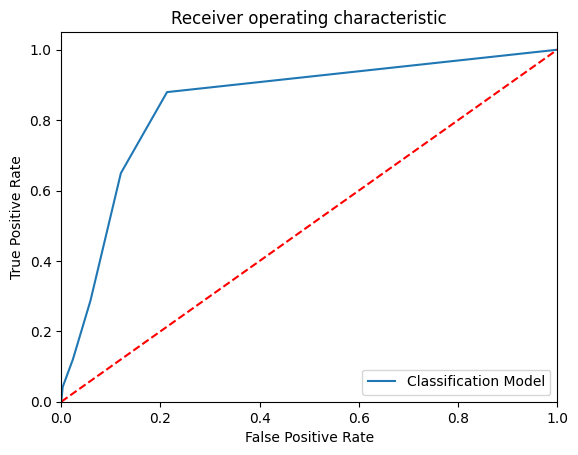

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  34  157]
 [  52 1355]]
Outcome values : 
 34 157 52 1355
Classification report : 
               precision    recall  f1-score   support

           1       0.40      0.18      0.25       191
           0       0.90      0.96      0.93      1407

    accuracy                           0.87      1598
   macro avg       0.65      0.57      0.59      1598
weighted avg       0.84      0.87      0.85      1598

Accuracy : 86.9 %
Precision : 39.5 %
Recall : 17.8 %
F1 Score : 0.245
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 57.0 %
MCC : 0.203
roc_auc_score: 0.571


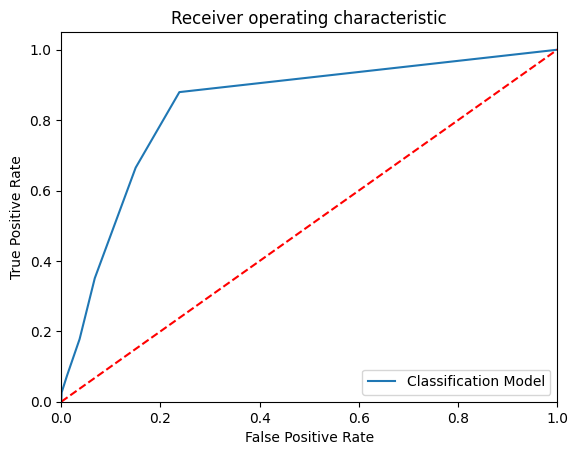

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[  47  144]
 [  65 1342]]
Outcome values : 
 47 144 65 1342
Classification report : 
               precision    recall  f1-score   support

           1       0.42      0.25      0.31       191
           0       0.90      0.95      0.93      1407

    accuracy                           0.87      1598
   macro avg       0.66      0.60      0.62      1598
weighted avg       0.85      0.87      0.85      1598

Accuracy : 86.9 %
Precision : 42.0 %
Recall : 24.6 %
F1 Score : 0.31
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 60.0 %
MCC : 0.254
roc_auc_score: 0.6


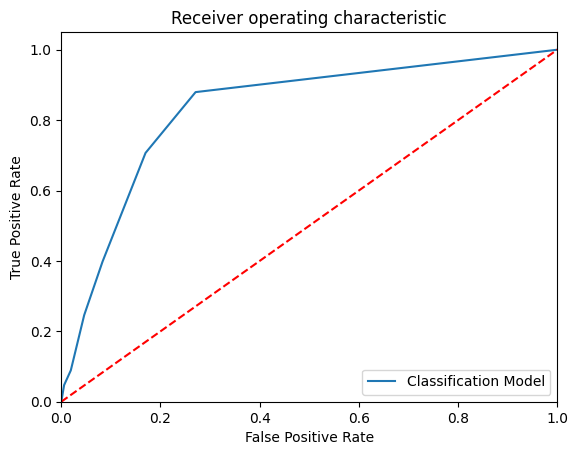

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  29  162]
 [  37 1370]]
Outcome values : 
 29 162 37 1370
Classification report : 
               precision    recall  f1-score   support

           1       0.44      0.15      0.23       191
           0       0.89      0.97      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.67      0.56      0.58      1598
weighted avg       0.84      0.88      0.85      1598

Accuracy : 87.5 %
Precision : 43.9 %
Recall : 15.2 %
F1 Score : 0.226
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 56.3 %
MCC : 0.205
roc_auc_score: 0.563


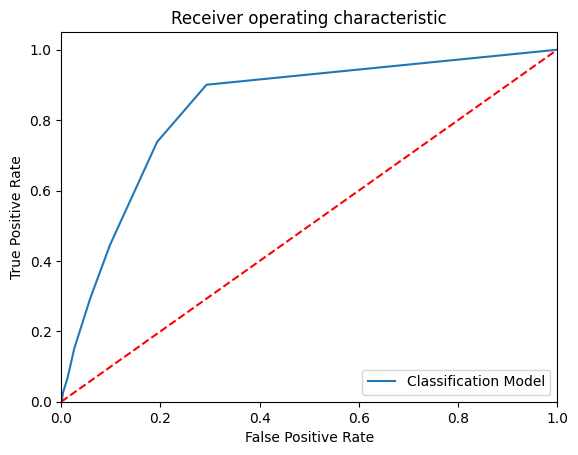

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[  37  154]
 [  48 1359]]
Outcome values : 
 37 154 48 1359
Classification report : 
               precision    recall  f1-score   support

           1       0.44      0.19      0.27       191
           0       0.90      0.97      0.93      1407

    accuracy                           0.87      1598
   macro avg       0.67      0.58      0.60      1598
weighted avg       0.84      0.87      0.85      1598

Accuracy : 87.4 %
Precision : 43.5 %
Recall : 19.4 %
F1 Score : 0.268
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 58.0 %
MCC : 0.231
roc_auc_score: 0.58


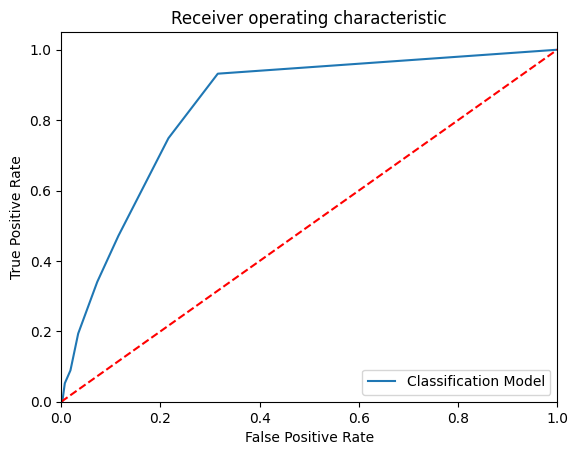

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[  24  167]
 [  35 1372]]
Outcome values : 
 24 167 35 1372
Classification report : 
               precision    recall  f1-score   support

           1       0.41      0.13      0.19       191
           0       0.89      0.98      0.93      1407

    accuracy                           0.87      1598
   macro avg       0.65      0.55      0.56      1598
weighted avg       0.83      0.87      0.84      1598

Accuracy : 87.4 %
Precision : 40.7 %
Recall : 12.6 %
F1 Score : 0.192
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 55.0 %
MCC : 0.173
roc_auc_score: 0.55


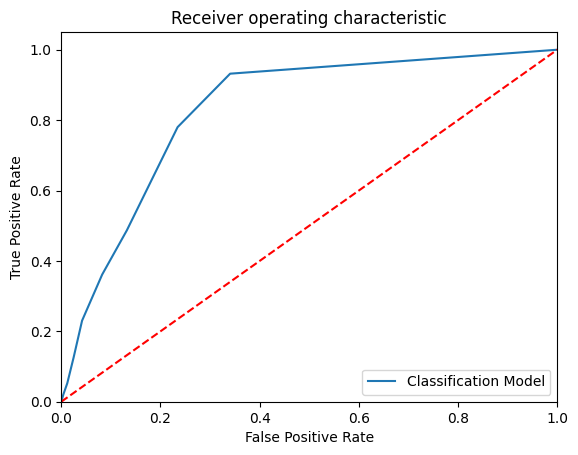

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[  31  160]
 [  40 1367]]
Outcome values : 
 31 160 40 1367
Classification report : 
               precision    recall  f1-score   support

           1       0.44      0.16      0.24       191
           0       0.90      0.97      0.93      1407

    accuracy                           0.87      1598
   macro avg       0.67      0.57      0.58      1598
weighted avg       0.84      0.87      0.85      1598

Accuracy : 87.5 %
Precision : 43.7 %
Recall : 16.2 %
F1 Score : 0.237
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 56.7 %
MCC : 0.211
roc_auc_score: 0.567


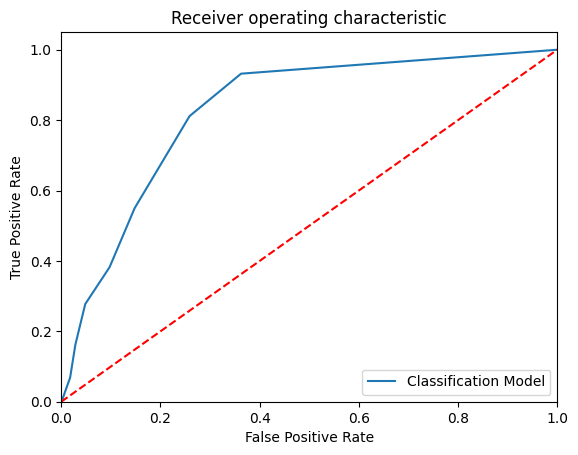

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[  19  172]
 [  30 1377]]
Outcome values : 
 19 172 30 1377
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.10      0.16       191
           0       0.89      0.98      0.93      1407

    accuracy                           0.87      1598
   macro avg       0.64      0.54      0.54      1598
weighted avg       0.83      0.87      0.84      1598

Accuracy : 87.4 %
Precision : 38.8 %
Recall : 9.9 %
F1 Score : 0.158
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 53.9 %
MCC : 0.147
roc_auc_score: 0.539


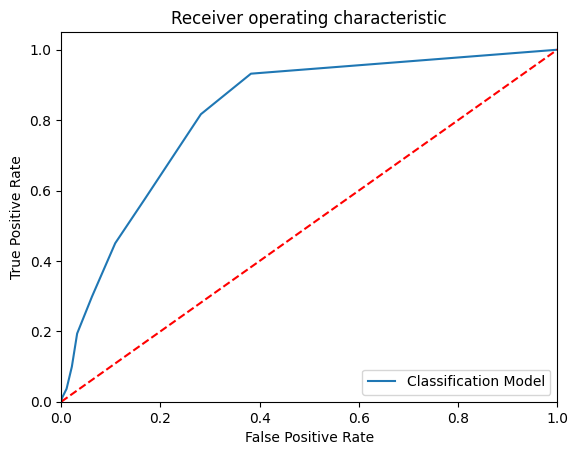

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  28  163]
 [  34 1373]]
Outcome values : 
 28 163 34 1373
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.15      0.22       191
           0       0.89      0.98      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.67      0.56      0.58      1598
weighted avg       0.84      0.88      0.85      1598

Accuracy : 87.7 %
Precision : 45.2 %
Recall : 14.7 %
F1 Score : 0.221
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 56.2 %
MCC : 0.206
roc_auc_score: 0.561


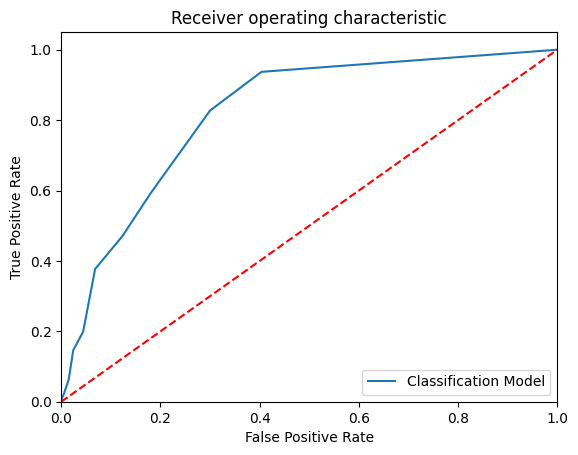

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[  17  174]
 [  24 1383]]
Outcome values : 
 17 174 24 1383
Classification report : 
               precision    recall  f1-score   support

           1       0.41      0.09      0.15       191
           0       0.89      0.98      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.65      0.54      0.54      1598
weighted avg       0.83      0.88      0.84      1598

Accuracy : 87.6 %
Precision : 41.5 %
Recall : 8.9 %
F1 Score : 0.147
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 53.6 %
MCC : 0.148
roc_auc_score: 0.536


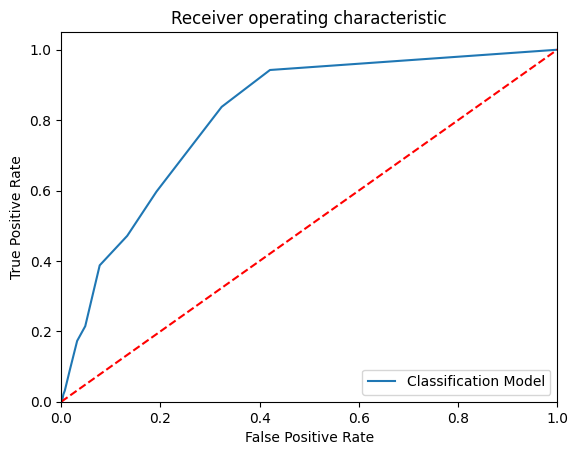

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[  20  171]
 [  32 1375]]
Outcome values : 
 20 171 32 1375
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.10      0.16       191
           0       0.89      0.98      0.93      1407

    accuracy                           0.87      1598
   macro avg       0.64      0.54      0.55      1598
weighted avg       0.83      0.87      0.84      1598

Accuracy : 87.3 %
Precision : 38.5 %
Recall : 10.5 %
F1 Score : 0.165
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 54.1 %
MCC : 0.15
roc_auc_score: 0.541


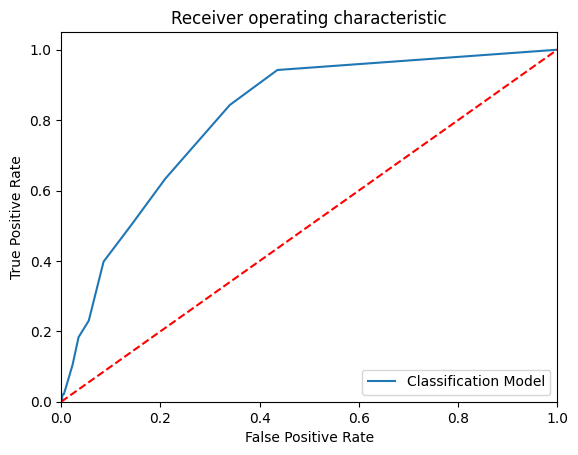

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[   9  182]
 [  15 1392]]
Outcome values : 
 9 182 15 1392
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.05      0.08       191
           0       0.88      0.99      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.63      0.52      0.51      1598
weighted avg       0.82      0.88      0.83      1598

Accuracy : 87.7 %
Precision : 37.5 %
Recall : 4.7 %
F1 Score : 0.084
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 51.8 %
MCC : 0.097
roc_auc_score: 0.518


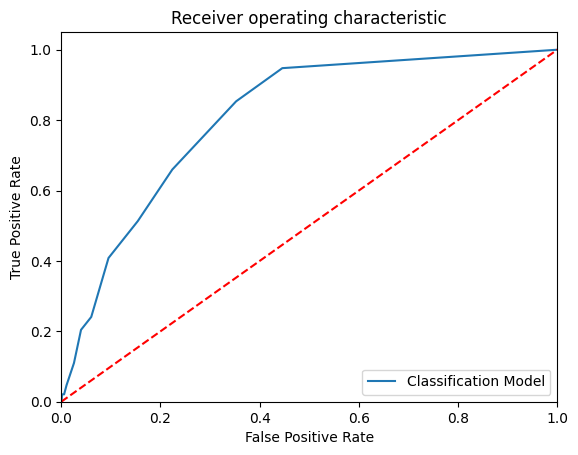

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[  12  179]
 [  20 1387]]
Outcome values : 
 12 179 20 1387
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.06      0.11       191
           0       0.89      0.99      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.63      0.52      0.52      1598
weighted avg       0.82      0.88      0.83      1598

Accuracy : 87.5 %
Precision : 37.5 %
Recall : 6.3 %
F1 Score : 0.108
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 52.4 %
MCC : 0.113
roc_auc_score: 0.524


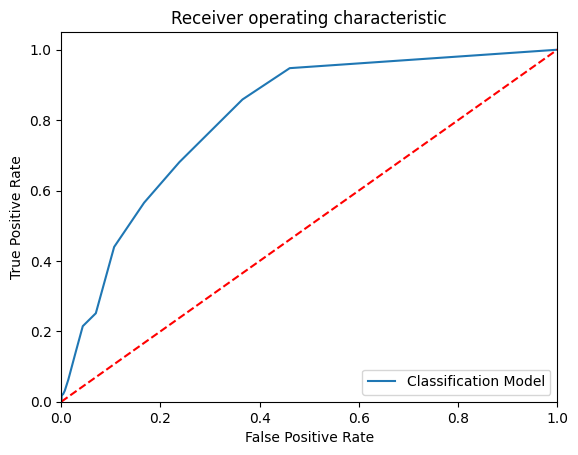

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[   8  183]
 [  13 1394]]
Outcome values : 
 8 183 13 1394
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.04      0.08       191
           0       0.88      0.99      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.63      0.52      0.50      1598
weighted avg       0.82      0.88      0.83      1598

Accuracy : 87.7 %
Precision : 38.1 %
Recall : 4.2 %
F1 Score : 0.075
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 51.6 %
MCC : 0.093
roc_auc_score: 0.516


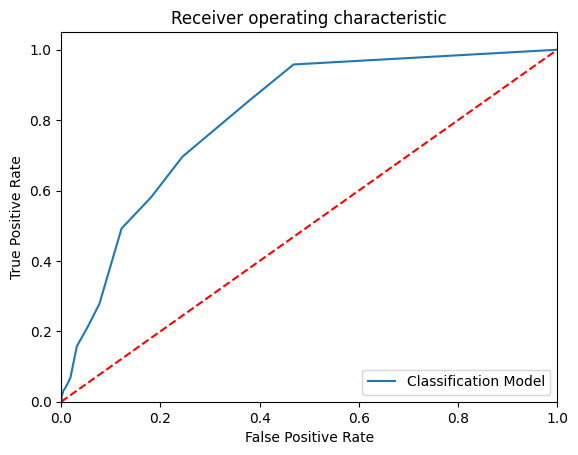

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[   9  182]
 [  13 1394]]
Outcome values : 
 9 182 13 1394
Classification report : 
               precision    recall  f1-score   support

           1       0.41      0.05      0.08       191
           0       0.88      0.99      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.65      0.52      0.51      1598
weighted avg       0.83      0.88      0.83      1598

Accuracy : 87.8 %
Precision : 40.9 %
Recall : 4.7 %
F1 Score : 0.085
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 51.9 %
MCC : 0.105
roc_auc_score: 0.519


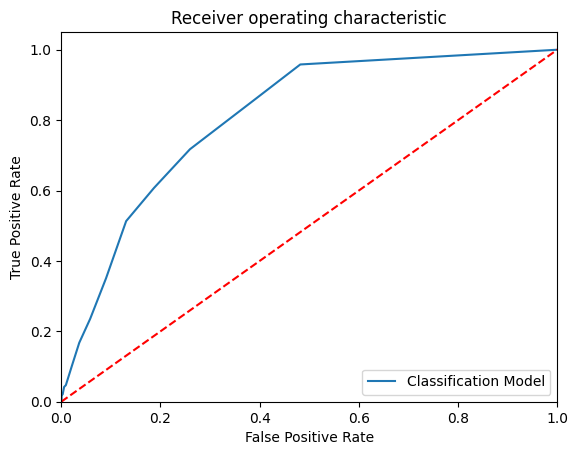

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[   9  182]
 [   8 1399]]
Outcome values : 
 9 182 8 1399
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.05      0.09       191
           0       0.88      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.71      0.52      0.51      1598
weighted avg       0.84      0.88      0.83      1598

Accuracy : 88.1 %
Precision : 52.9 %
Recall : 4.7 %
F1 Score : 0.087
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 52.0 %
MCC : 0.131
roc_auc_score: 0.521


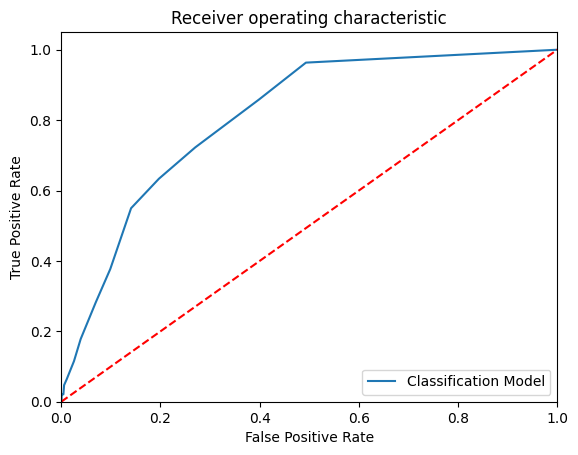

In [31]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNNResults = pd.concat([KNNResults, pd.DataFrame([new_row])], ignore_index=True)

In [32]:
#Display the results of KNN Algorithm
KNNResults

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,142,49,77,1330,0.921,0.648,0.743,0.693,0.945,0.650,0.844365,0.844
1,KNeighborsClassifier(n_neighbors=2),2,87,104,57,1350,0.899,0.604,0.455,0.519,0.959,0.470,0.707493,0.707
2,KNeighborsClassifier(n_neighbors=3),3,102,89,105,1302,0.879,0.493,0.534,0.513,0.925,0.444,0.729702,0.730
3,KNeighborsClassifier(n_neighbors=4),4,43,148,58,1349,0.871,0.426,0.225,0.295,0.959,0.245,0.591954,0.592
4,KNeighborsClassifier(),5,55,136,83,1324,0.863,0.399,0.288,0.334,0.941,0.264,0.614484,0.614
5,KNeighborsClassifier(n_neighbors=6),6,34,157,52,1355,0.869,0.395,0.178,0.245,0.963,0.203,0.570526,0.570
6,KNeighborsClassifier(n_neighbors=7),7,47,144,65,1342,0.869,0.420,0.246,0.310,0.954,0.254,0.599938,0.600
7,KNeighborsClassifier(n_neighbors=8),8,29,162,37,1370,0.875,0.439,0.152,0.226,0.974,0.205,0.562768,0.563
8,KNeighborsClassifier(n_neighbors=9),9,37,154,48,1359,0.874,0.435,0.194,0.268,0.966,0.231,0.579801,0.580
9,KNeighborsClassifier(n_neighbors=10),10,24,167,35,1372,0.874,0.407,0.126,0.192,0.975,0.173,0.550389,0.550


# Compare the classification Algorithms

In [33]:
# Load the results file for classification
EMResults = pd.read_csv(r"D:\navvspace\Danger\Brain Stroke\EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  11  180]
 [   8 1399]]
Outcome values : 
 11 180 8 1399
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.06      0.10       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.73      0.53      0.52      1598
weighted avg       0.85      0.88      0.84      1598

Accuracy : 88.2 %
Precision : 57.9 %
Recall : 5.8 %
F1 Score : 0.105
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 52.6 %
MCC : 0.155
roc_auc_score: 0.526


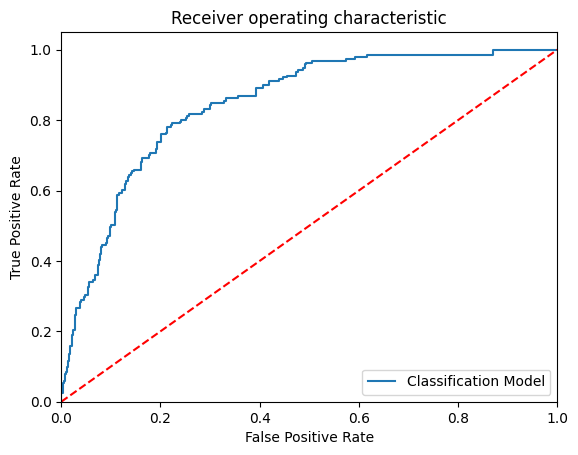

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 125   66]
 [  84 1323]]
Outcome values : 
 125 66 84 1323
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.65      0.62       191
           0       0.95      0.94      0.95      1407

    accuracy                           0.91      1598
   macro avg       0.78      0.80      0.79      1598
weighted avg       0.91      0.91      0.91      1598

Accuracy : 90.6 %
Precision : 59.8 %
Recall : 65.4 %
F1 Score : 0.625
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 79.7 %
MCC : 0.572
roc_auc_score: 0.797


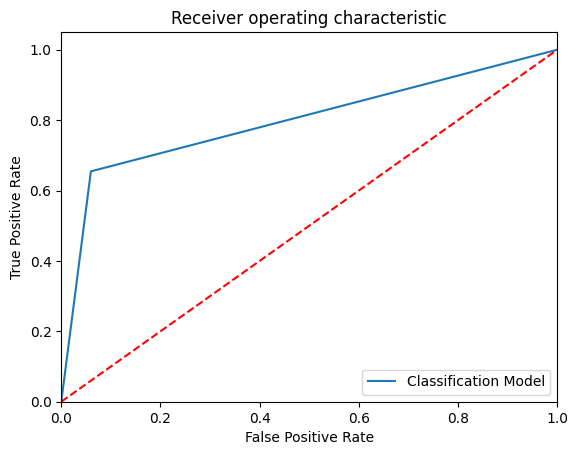

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 130   61]
 [  17 1390]]
Outcome values : 
 130 61 17 1390
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.68      0.77       191
           0       0.96      0.99      0.97      1407

    accuracy                           0.95      1598
   macro avg       0.92      0.83      0.87      1598
weighted avg       0.95      0.95      0.95      1598

Accuracy : 95.1 %
Precision : 88.4 %
Recall : 68.1 %
F1 Score : 0.769
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 83.4 %
MCC : 0.75
roc_auc_score: 0.834


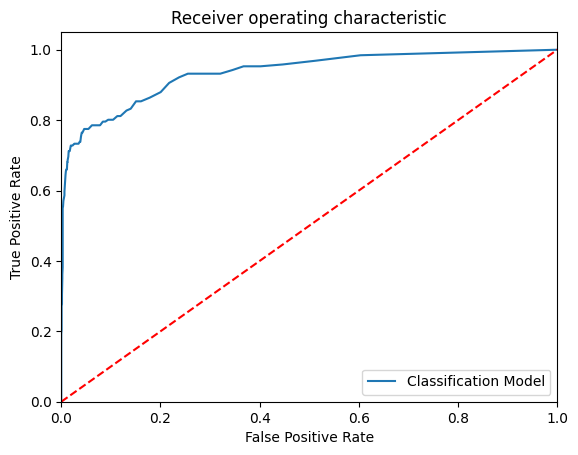

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 137   54]
 [  22 1385]]
Outcome values : 
 137 54 22 1385
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.72      0.78       191
           0       0.96      0.98      0.97      1407

    accuracy                           0.95      1598
   macro avg       0.91      0.85      0.88      1598
weighted avg       0.95      0.95      0.95      1598

Accuracy : 95.2 %
Precision : 86.2 %
Recall : 71.7 %
F1 Score : 0.783
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 85.0 %
MCC : 0.76
roc_auc_score: 0.851


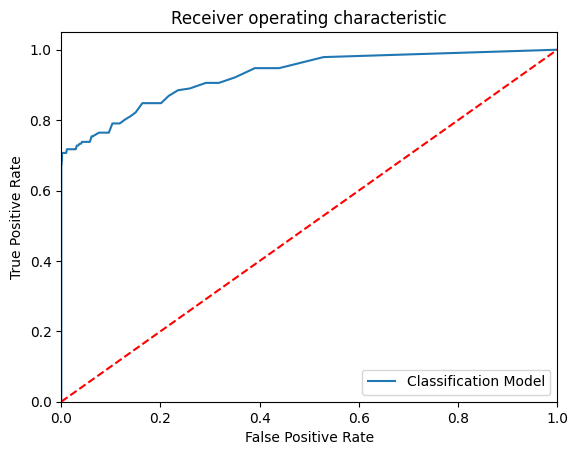

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 142   49]
 [  77 1330]]
Outcome values : 
 142 49 77 1330
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.74      0.69       191
           0       0.96      0.95      0.95      1407

    accuracy                           0.92      1598
   macro avg       0.81      0.84      0.82      1598
weighted avg       0.93      0.92      0.92      1598

Accuracy : 92.1 %
Precision : 64.8 %
Recall : 74.3 %
F1 Score : 0.693
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 84.4 %
MCC : 0.65
roc_auc_score: 0.844


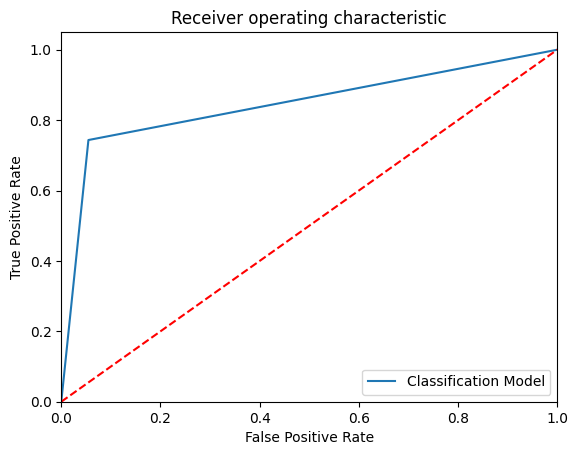

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  93   98]
 [ 201 1206]]
Outcome values : 
 93 98 201 1206
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.49      0.38       191
           0       0.92      0.86      0.89      1407

    accuracy                           0.81      1598
   macro avg       0.62      0.67      0.64      1598
weighted avg       0.85      0.81      0.83      1598

Accuracy : 81.3 %
Precision : 31.6 %
Recall : 48.7 %
F1 Score : 0.384
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 67.2 %
MCC : 0.288
roc_auc_score: 0.672


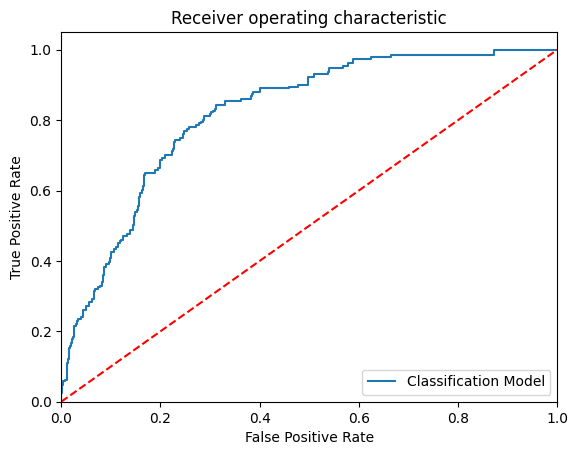

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)
Confusion matrix : 
 [[161  30]
 [413 994]]
Outcome values : 
 161 30 413 994
Classification report : 
               precision    recall  f1-score   support

           1       0.28      0.84      0.42       191
           0       0.97      0.71      0.82      1407

    accuracy                           0.72      1598
   macro avg       0.63      0.77      0.62      1598
weighted avg       0.89      0.72      0.77      1598

Accuracy : 72.3 %
Precision : 28.0 %
Recall : 84.3 %
F1 Score : 0.421
Specificity or True Negative Rate : 70.6 %
Balanced Accuracy : 77.4 %
MCC : 0.371
roc_auc_score: 0.775


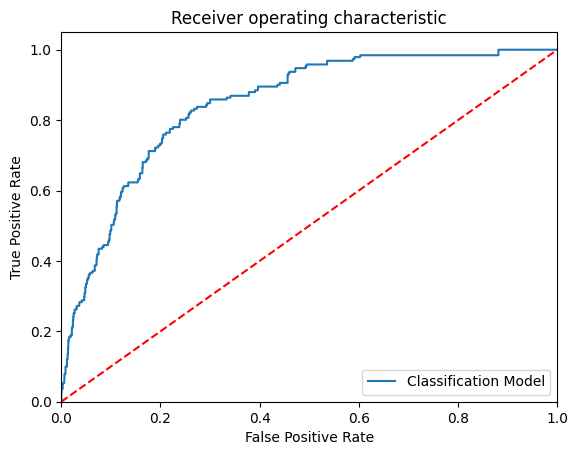

-----------------------------------------------------------------------------------------------------


In [34]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelGNB = GaussianNB()
ModelSVM = SVC(kernel='linear', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = pd.concat([EMResults, pd.DataFrame([new_row])], ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>


In [35]:
# Display the results of all models
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),11,180,8,1399,0.882,0.579,0.058,0.105,0.994,0.155,0.525953,0.526
1,DecisionTreeClassifier(),125,66,84,1323,0.906,0.598,0.654,0.625,0.940,0.572,0.797374,0.797
2,"(DecisionTreeClassifier(max_features='sqrt', r...",130,61,17,1390,0.951,0.884,0.681,0.769,0.988,0.750,0.834273,0.834
3,"(ExtraTreeClassifier(random_state=2008971285),...",137,54,22,1385,0.952,0.862,0.717,0.783,0.984,0.760,0.850821,0.850
4,KNeighborsClassifier(n_neighbors=1),142,49,77,1330,0.921,0.648,0.743,0.693,0.945,0.650,0.844365,0.844
5,GaussianNB(),93,98,201,1206,0.813,0.316,0.487,0.384,0.857,0.288,0.672027,0.672
6,"SVC(class_weight='balanced', kernel='linear', ...",161,30,413,994,0.723,0.280,0.843,0.421,0.706,0.371,0.774700,0.774


In [36]:
# Assuming you have also predicted using ExtraTreeClassifier(Model ET)
# Since having more accuracy we have choosen it for prediction
y_pred=ModelET.predict(x_test)

In [39]:
# Display the Final results by merging duplicate file

Results=pd.DataFrame({'stroke_A':y_test,'stroke_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal=StrokeData_bk.merge(Results,left_index=True,right_index=True)

#Display 10 records randomly

ResultsFinal.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_A,stroke_P
2758,Female,26.0,0,0,No,Private,Urban,81.94,26.0,smokes,0,0,0
61,Female,80.0,0,1,Yes,Self-employed,Rural,66.72,21.7,formerly smoked,1,1,1
4220,Female,56.0,0,0,Yes,Private,Urban,144.33,29.2,never smoked,0,0,0
2882,Female,61.0,0,0,Yes,Private,Urban,115.42,16.7,smokes,0,0,0
1471,Female,15.0,0,0,No,children,Urban,81.11,20.2,Unknown,0,0,0
3113,Male,23.0,0,0,No,Private,Rural,67.76,26.0,never smoked,0,0,0
1027,Female,36.0,0,0,Yes,Private,Urban,76.93,21.6,never smoked,0,0,0
1965,Male,53.0,0,0,Yes,Private,Urban,76.03,27.3,never smoked,0,0,0
4942,Male,34.0,0,0,Yes,Private,Urban,99.23,29.7,smokes,0,0,0
4825,Male,40.0,0,0,Yes,Private,Rural,89.77,30.1,smokes,0,0,0
